# Exercises for machine learning for singletop events

In [ ]:
import ROOT
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import root_pandas

### Load the data

In [4]:
inpath = '/eos/user/l/llayer/tutorials/singletop/muon/'
# Selected tt events
tt_file = 'trees_TT_muon.root'
# Selected single top t-channel events
st_file = 'trees_ST_T_tch_muon.root'

In [5]:
# Convert ROOT to pandas
tt = root_pandas.read_root( inpath + tt_file, 'events_2j1t' )
st = root_pandas.read_root( inpath + st_file, 'events_2j1t' )

In [6]:
# Print the first 5 lines
tt.head()

,w_nominal,btagUp,btagDown,mistagUp,mistagDown,puUp,puDown,lepUp,lepDown,q2Up,q2Down,jesUp,jesDown,jerUp,jerDown,pdf_totalUp,pdf_totalDown,cmvajesUp,cmvajesDown,cmvalfUp,cmvalfDown,cmvahfstats1Up,cmvahfstats1Down,cmvahfstats2Up,cmvahfstats2Down,cmvalfstats1Up,cmvalfstats1Down,cmvalfstats2Up,cmvalfstats2Down,cmvacferr1Up,cmvacferr1Down,f31,w,bdt_st_vs_qcd,etajprime,jprimeflavour,bjetflavour,bjeteta,bjetpt,topMass,topY,topPt,topMt,topEta,costhetapol,costhetael,mlb,mljprime,mljextra,mt2w,mindeltaphi,mindeltaphi20,mtw,MET,topMassExtra,topMtExtra,topYExtra,topPtExtra,topEtaExtra,costhetapolExtra,costhetaelExtra,nextrajets,leadingextrajetcsv,leadingextrajetflavour,leadingextrajetpt,leadingextrajeteta,leadingextrajetcsvweight,leadingextrajetcsvweight_sd
0,1.000280,1.001152,0.998638,1.000280,1.000280,0.944694,1.040608,1.056263,0.944297,1.002569,0.910419,1.000280,1.000280,1.000280,1.000280,1.021870,0.978690,0.990093,0.977178,1.088194,1.088194,1.088194,1.088194,1.088194,1.088194,0.990490,1.010148,1.088194,1.088194,1.088194,1.088194,1.0,0.367664,-999.0,0.398882,5.0,5.0,1.715100,46.083786,162.630524,-81.150856,82.236809,161.440582,1.205882,-0.978953,0.906190,126.122360,102.727806,166.806198,130.682419,-1.080456,-0.308556,62.344704,23.377207,189.735977,189.343323,-9.024198,32.761990,2.280379,-0.987912,0.963416,1.0,0.087549,4.0,32.639980,2.277162,0.919211,0.0
1,0.956355,0.969903,0.942806,0.956190,0.956519,0.897703,1.014858,0.958665,0.954044,0.995609,0.798439,0.956355,0.956355,0.956355,0.956355,0.977288,0.935421,0.956355,0.956355,0.956355,0.956355,0.956355,0.956355,0.956355,0.956355,0.956355,0.956355,0.956355,0.956355,0.858836,1.473518,1.0,0.372131,-999.0,1.041610,3.0,5.0,0.009964,87.740005,191.657928,18.682318,23.320192,179.368774,0.944249,0.216274,0.409683,141.996475,91.347435,55.001755,102.552673,-2.235936,0.450361,49.645718,31.082462,101.363533,78.966423,-95.915230,101.654526,0.236562,0.106243,0.984821,2.0,-0.051756,0.0,39.150242,-0.007522,1.000000,0.0
2,0.945658,0.960238,0.931077,0.945510,0.945806,0.887663,1.003507,1.002701,0.888615,0.777980,1.157825,0.945658,0.945658,0.945658,0.945658,0.965728,0.925588,0.945294,0.941250,0.938687,0.938687,0.938687,0.938687,0.938687,0.938687,0.945454,0.945863,0.938687,0.938687,0.938687,0.938687,1.0,0.360787,-999.0,1.338448,2.0,-5.0,0.177493,62.170399,157.886719,-44.652359,58.107037,116.607994,1.262888,0.586669,-0.400289,63.115513,88.190926,59.882507,102.678230,-1.428854,-0.471460,30.666962,37.164978,199.720062,75.552605,49.340343,86.583710,0.046579,0.003284,-0.749731,2.0,-0.953238,-5.0,37.940350,-1.484109,1.007427,0.0
3,0.961350,0.974209,0.948490,0.961178,0.961521,0.846518,1.063154,0.965491,0.957208,0.860029,1.048710,0.961350,0.961350,0.961350,0.961350,0.984090,0.938609,0.933889,0.987539,1.025233,1.025233,1.025233,1.025233,1.025233,1.025233,0.964529,0.958124,1.025233,1.025233,1.025233,1.025233,1.0,0.420365,-999.0,1.795406,21.0,5.0,-0.086996,107.675331,233.759766,-4.235421,27.322845,258.226624,1.504295,0.404625,0.463674,187.935883,100.639824,105.944382,142.668396,1.652825,-2.803979,121.785797,64.984169,162.837723,198.266693,-52.769688,98.515259,1.575245,-0.120679,0.509101,3.0,-0.772614,-5.0,33.134560,2.278184,0.937689,0.0
4,0.958861,0.972405,0.945317,0.958754,0.958968,0.944244,0.947746,0.963665,0.954057,0.829214,1.091322,0.958861,0.958861,0.958861,0.958861,0.979661,0.938061,0.955847,0.958122,0.952052,0.952052,0.952052,0.952052,0.952052,0.952052,0.958748,0.958974,0.952052,0.952052,0.952052,0.952052,1.0,0.356420,-999.0,0.883891,21.0,-5.0,0.834826,96.738304,450.358948,-120.613014,239.244186,410.352325,-1.225071,0.950082,-0.229216,348.314117,240.439468,110.585587,128.931168,-2.800332,-1.859620,61.844261,99.815758,177.704605,173.754929,-94.944855,133.414185,-2.063634,0.796360,-0.823374,4.0,-0.945806,5.0,34.040855,-1.245445,1.007152,0.0


### Make some plots

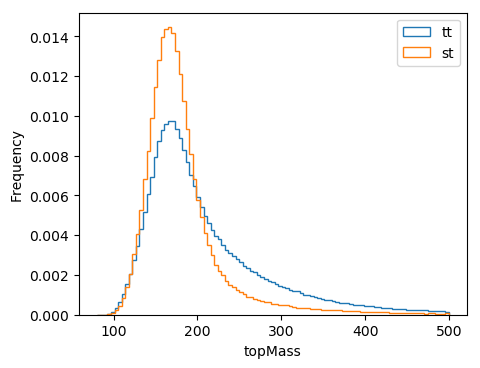

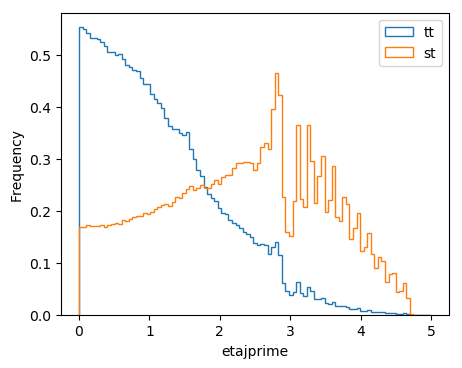

In [8]:
VAR1 = 'topMass'
VAR2 = 'etajprime'
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VAR1)
bins = np.linspace(80, 500, 100)
tt[VAR1].plot.hist(bins, alpha=1, label='tt',histtype='step', normed=True)
st[VAR1].plot.hist(bins, alpha=1, label='st',histtype='step', normed=True)
plt.legend(loc='upper right')
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VAR2)
bins = np.linspace(0, 5, 100)
tt[VAR2].plot.hist(bins, alpha=1, label='tt',histtype='step', normed=True)
st[VAR2].plot.hist(bins, alpha=1, label='st',histtype='step', normed=True)
plt.legend(loc='upper right')

### Prepare the data for the machine learning

In [10]:
# add label
tt['label'] = np.zeros(len(tt)) 
st['label'] = np.ones(len(st))

In [12]:
# Comput the weights
tt['weight'] = tt.w * tt.w_nominal
st['weight'] = st.w * st.w_nominal

In [14]:
# Concat the samples
data = pd.concat([tt, st], axis=0)

In [15]:
# Select the variables for the machine learning
VARS = [
    'etajprime',
    'topMass',
    'costhetael',
    'costhetapol',
    'MET',
    'mtw',
    'mlb',
    #'mljextra',
    'mljprime',
    #'nextrajets',
    #'topMassExtra',
    #'costhetaelExtra',
    #'costhetapolExtra',
    #'leadingextrajetcsv'
]

In [16]:
# Split into features, target and weights
X, y, weights = data[VARS], data['label'].values, data['weight'].values

In [18]:
# Inspect the features
X.head()

,etajprime,topMass,costhetael,costhetapol,MET,mtw,mlb,mljprime
0,0.398882,162.630524,0.906190,-0.978953,23.377207,62.344704,126.122360,102.727806
1,1.041610,191.657928,0.409683,0.216274,31.082462,49.645718,141.996475,91.347435
2,1.338448,157.886719,-0.400289,0.586669,37.164978,30.666962,63.115513,88.190926
3,1.795406,233.759766,0.463674,0.404625,64.984169,121.785797,187.935883,100.639824
4,0.883891,450.358948,-0.229216,0.950082,99.815758,61.844261,348.314117,240.439468


In [25]:
# Split into training and test sample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split( X, y, weights, 
                                                                                  test_size = 0.3, random_state = 100)

## Train a Boosted Decision Tree with XGBoost

### Train

In [27]:
import xgboost as xgb

# Hyperparameters:
n_estimators = 100
learning_rate = 0.3
reg_alpha = 0.0
max_depth = 6
min_child_weight = 1


# Early stopping
early_stopping_rounds = 10

# Define model
model_bdt = xgb.XGBClassifier(n_jobs = 4, n_estimators = n_estimators, learning_rate = learning_rate,
                              max_depth = max_depth, min_child_weight = min_child_weight)

# Last in list is used for early stopping
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit with early stopping
model_bdt.fit(X_train, y_train, eval_metric=["logloss"], eval_set=eval_set, 
              early_stopping_rounds=early_stopping_rounds, verbose=True)

[0]	validation_0-logloss:0.61538	validation_1-logloss:0.61521
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.572383	validation_1-logloss:0.573079
[2]	validation_0-logloss:0.547638	validation_1-logloss:0.548325
[3]	validation_0-logloss:0.53192	validation_1-logloss:0.533013
[4]	validation_0-logloss:0.52214	validation_1-logloss:0.523303
[5]	validation_0-logloss:0.515377	validation_1-logloss:0.516863
[6]	validation_0-logloss:0.510525	validation_1-logloss:0.512261
[7]	validation_0-logloss:0.507229	validation_1-logloss:0.509107
[8]	validation_0-logloss:0.504862	validation_1-logloss:0.507003
[9]	validation_0-logloss:0.503062	validation_1-logloss:0.505343
[10]	validation_0-logloss:0.501246	validation_1-logloss:0.503795
[11]	validation_0-logloss:0.499986	validation_1-logloss:0.502715
[12]	validation_0-logloss:0.498894	validation_1-logloss:0.501741
[13]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.3,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

### Evaluate the performance

Accuracy: 76.29%


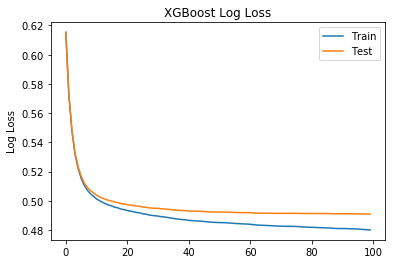

In [29]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, f1_score, confusion_matrix

# make predictions for test data
y_pred = model_bdt.predict_proba(X_test)[:,1]
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model_bdt.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

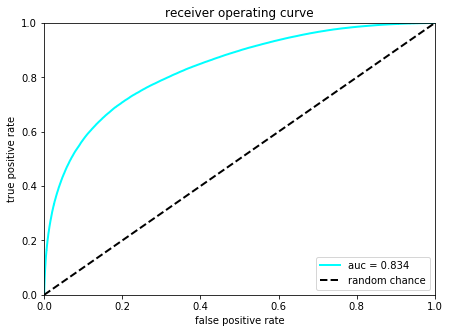

In [30]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(fpr, tpr, lw=2, color='cyan', label='auc = %.3f' % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title('receiver operating curve')
ax.legend(loc="lower right")
plt.show()

In [33]:
# Overtraining
def compare_train_test(clf, X_train, y_train, X_test, y_test, bins=30):
    
    decisions = []
    for X,y in ((X_train, y_train), (X_test, y_test)):
        d1 = clf.predict_proba(X[y>0.5])[:,1].ravel()
        d2 = clf.predict_proba(X[y<0.5])[:,1].ravel()
        decisions += [d1, d2]
        
    low = min(np.min(d) for d in decisions)
    high = max(np.max(d) for d in decisions)
    low_high = (low,high)
    
    plt.hist(decisions[0],
             color='r', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='S (train)')
    plt.hist(decisions[1],
             color='b', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='B (train)')

    hist, bins = np.histogram(decisions[2],
                              bins=bins, range=low_high, normed=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale
    
    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.errorbar(center, hist, yerr=err, fmt='o', c='r', label='S (test)')
    
    hist, bins = np.histogram(decisions[3],
                              bins=bins, range=low_high, normed=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    plt.errorbar(center, hist, yerr=err, fmt='o', c='b', label='B (test)')

    plt.xlabel("Output")
    plt.ylabel("Arbitrary units")
    plt.legend(loc='best')          

/usr/local/bin/start_ipykernel.py:24: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/usr/local/bin/start_ipykernel.py:33: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


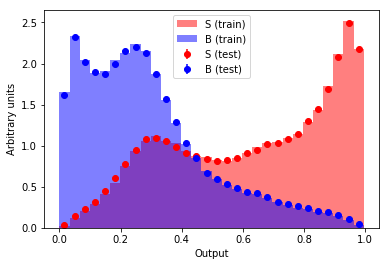

In [35]:
compare_train_test(model_bdt, X_train, y_train, X_test, y_test)

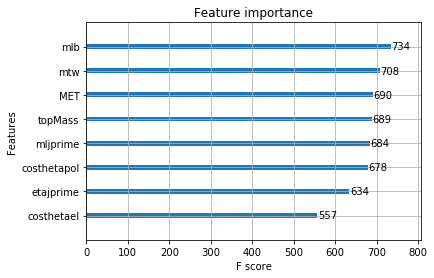

In [36]:
# Feature importance
from xgboost import plot_importance
plot_importance(model_bdt)

## Train a Neural Network with Keras

### Train

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier


# Hyperparameters
learning_rate = 0.001
n_hidden = 2
units = 8
dropout = 0.0

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=len(VARS), activation='relu'))
    for _ in range(n_hidden):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    opt = Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

Using TensorFlow backend.


In [44]:
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=1000, verbose=1)

In [48]:
# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [51]:
history = model.fit(X_train, y_train, callbacks=[early_stopping], 
                    validation_data = (X_test, y_test))

Train on 979753 samples, validate on 419895 samples
Epoch 1/30
979753/979753 [==============================] - 3s 3us/step - loss: 1.2197 - acc: 0.6609 - val_loss: 0.5755 - val_acc: 0.7098
Epoch 2/30
979753/979753 [==============================] - 2s 3us/step - loss: 0.5503 - acc: 0.7316 - val_loss: 0.5581 - val_acc: 0.7156
Epoch 3/30
979753/979753 [==============================] - 2s 2us/step - loss: 0.5351 - acc: 0.7393 - val_loss: 0.5309 - val_acc: 0.7406
Epoch 4/30
979753/979753 [==============================] - 2s 3us/step - loss: 0.5321 - acc: 0.7410 - val_loss: 0.5314 - val_acc: 0.7430
Epoch 5/30
979753/979753 [==============================] - 2s 2us/step - loss: 0.5302 - acc: 0.7418 - val_loss: 0.5299 - val_acc: 0.7409
Epoch 6/30
979753/979753 [==============================] - 2s 2us/step - loss: 0.5294 - acc: 0.7425 - val_loss: 0.5272 - val_acc: 0.7445
Epoch 7/30
979753/979753 [==============================] - 2s 2us/step - loss: 0.5285 - acc: 0.7427 - val_loss: 0.5326 

### Evaluate

419895/419895 [==============================] - 0s 1us/step


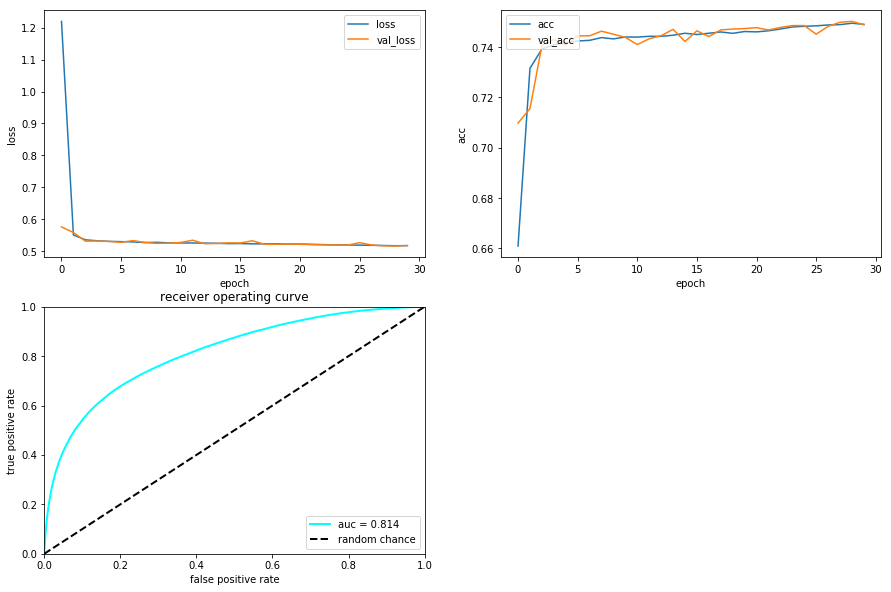

In [53]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
# plot loss vs epoch
plt.figure(figsize=(15,10))
ax = plt.subplot(2, 2, 1)
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 2)
ax.plot(history.history['acc'], label='acc')
ax.plot(history.history['val_acc'], label='val_acc')
ax.legend(loc="upper left")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

# Plot ROC
y_predict = model.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
ax = plt.subplot(2, 2, 3)
ax.plot(fpr, tpr, lw=2, color='cyan', label='auc = %.3f' % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title('receiver operating curve')
ax.legend(loc="lower right")
plt.show()

236592/236592 [==============================] - 0s 1us/step


/usr/local/bin/start_ipykernel.py:24: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/usr/local/bin/start_ipykernel.py:33: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


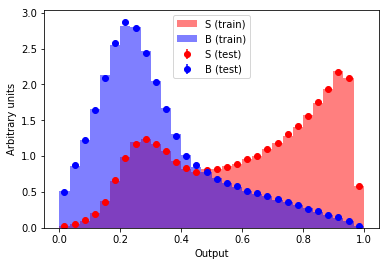

In [55]:
compare_train_test(model, X_train, y_train, X_test, y_test)

## Load trees and save the results

In [60]:
from root_numpy import root2array, array2root

# Inpath
inpath = '/eos/user/l/llayer/tutorials/singletop/muon/'
# Apply this to a new tree
data_file = 'trees_Data_muon.root'
path = inpath+data_file

def predict_root(infile, model, col_name, outfile = 'test.root', tree_name = '2j1t'):
    
    frame = root_pandas.read_root( path, 'events_2j1t' )
    frame[col_name] = model.predict_proba(frame[VARS])[:,1]
    frame.to_root(outfile, key=tree_name)

In [62]:
predict_root(path, model, 'nn')

537685/537685 [==============================] - 0s 1us/step
